In [4]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/datasets/loanDataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import sqrt, abs, round
import scipy.stats as stats
from scipy.stats import norm
df=pd.read_csv(file_path)
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [6]:
M_mean=df.loc[df['Gender']=='Male','ApplicantIncome'].mean()
F_mean=df.loc[df['Gender']=='Female','ApplicantIncome'].mean()
M_std=df.loc[df['Gender']=='Male','ApplicantIncome'].std()
F_std=df.loc[df['Gender']=='Female','ApplicantIncome'].std()
no_of_M=df.loc[df['Gender']=='Male','ApplicantIncome'].count()
no_of_F=df.loc[df['Gender']=='Female','ApplicantIncome'].count()

Z-Test:

A Z-test is used to compare the mean of two given samples and infer whether they are from the same distribution or not. We do not implement Z-test when the sample size is less than 30. T-test is prefereed in such cases.

A Z-Test may be a one-sample Z test or a two-sample Z test.

The One-Sample Z-Test determines whether the sample mean is statistically different from a known or hypothesized population mean. The two-sample Z-test compares 2 independent variables.

Here:
Two sample z-test is implemented where one variable is categorical with two categories and the other variable is continuous to apply the z-test.

Gender is the categorial variable with Male and Female and ApplicantIncome is the continuous variable.

Null Hypothesis: There is no significant difference between the mean Income of males and females.

Alternate Hypothesis: There is a significant difference between the mean Income of males and females.

In [10]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z,3), pval

z,p= twoSampZ(M_mean,F_mean,0,M_std,F_std,no_of_M,no_of_F)
print("Z=", z)
print("p=" ,p)


if p<0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")
    print("Therefore, we conclude that there is no significant difference between the income of males and females.")

Z= 1.828
p= 0.06759726635832197
we accept null hypothesis
Therefore, we conclude that there is no significant difference between the income of males and females.


**Correlation Test**
A correlation test is a metric to evaluate the extent to which variables are associated with one another. The variables must be continuous to apply the correlation test. There are several methods for correlation tests i.e. Covariance, Pearson correlation coefficient, Spearman rank correlation coefficient, etc.

**Pearson Correlation Coefficient(r)**
It is used to measure the linear correlation between 2 variables and it is independent of the values of variables.
- Its values lie between -1 and 1.
- If the value of r is 0, it means there is no relationship between variables X and Y.
- If the value of r is between 0 and 1, it means there is a positive relation between X and Y, and their strength increases from 0 to 1. Positive relation means if the value of X increases, the value of Y also increases.
- If the value of r is between -1 and 0, it means there is a negative relation between X and Y, and their strength decreases from -1 to 0. Negative relation means if the value of X increases, the value of Y decreases.
Two continuous variables or features are selected– Loan Amount and Applicant Income. The problem is to identify if there is a linear relation between Loan Amount and Applicant Income with the Pearson correlation Coefficient value and also draw the chart between them.

[[1.         0.56562046]
 [0.56562046 1.        ]]
The values on the diagonals indicate the correlation of features with themselves. 0.56 represent that there is some correlation between the two features.


<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

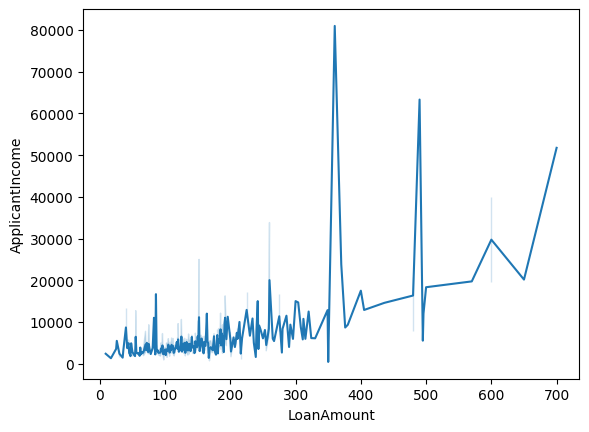

In [13]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
pcc = np.corrcoef(df.ApplicantIncome, df.LoanAmount)
print(pcc)
print("The values on the diagonals indicate the correlation of features with themselves. 0.56 represent that there is some correlation between the two features.")

sns.lineplot(data=df,x='LoanAmount',y='ApplicantIncome')

**Chi-Square Test**
This test is applied when you have two categorical variables from a population. It is used to determine whether there is a significant association or relationship between the two variables.

There are 2 types of chi-square tests: chi-square goodness of fit and chi-square test for independence, we will implement the latter one.

The degree of freedom in the chi-square test is calculated by (n-1)*(m-1) where n and m are numbers of rows and columns respectively.

Two categorical features Gender and Loan Status are used to see whether there is an association between them using the chi-square test.

Null Hypothesis: There is no significant association between Gender and Loan Status features.

Alternate Hypothesis: There is a significant association between Gender and Loan Status features.

In [15]:
dataset_table=pd.crosstab(df['Gender'],df['Loan_Status'])
dataset_table

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [17]:
#we calculate observed and expected values using the above table.
observed=dataset_table.values
val2=stats.chi2_contingency(dataset_table)
expected=val2[3]
# we calculate the chi-square statistic and p-value
# Degree of Freedom
ddof=1
# Significance level
alpha= 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed,expected)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

print("chi-square statistic:-",chi_square_statistic)

print('Significance level: ',alpha)

print('Degree of Freedom: ',ddof)

print('p-value:',p_value)


if p_value<=alpha:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypthesis")
    print("there is no significant association between the two features.")

chi-square statistic:- 0.23697508750826923
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.6263994534115932
Accept Null Hypthesis
there is no significant association between the two features.


**ANOVA Test**
ANOVA stands for Analysis of variance. As the name, suggests it uses variance as its parameter to compare multiple independent groups. ANOVA can be one-way ANOVA or two-way ANOVA. One-way ANOVA (F-test) is applied when there are three or more independent groups of a variable.

The Dependents categorial variable and ApplicantIncome continuous variable is used. Dependents has 4 groups: 0,1,2,3+. Therefore the hypothesis will be:

Null Hypothesis: There is no significant difference between the mean Income among different groups of dependents.

Alternate Hypothesis: There is a significant difference between the mean Income among different groups of dependents.



In [21]:
df['Dependents'].isnull().sum()
df['Dependents']=df['Dependents'].fillna('0')

df_anova = df[['ApplicantIncome','Dependents']]
grps = pd.unique(df.Dependents.values)
print(grps)
d_data = {grp:df_anova['ApplicantIncome'][df_anova.Dependents == grp] for grp in grps}
F, p = stats.f_oneway(d_data['0'], d_data['1'], d_data['2'],d_data['3+'])

print('F ={},p={}'.format(F,p))

if p<0.05:
    print("Reject null hypothesis")
    print("There is a significant difference between the income of several groups of Dependents.")

else:
    print("Accept null hypothesis")

['0' '1' '2' '3+']
F =5.955112389949444,p=0.0005260114222572804
Reject null hypothesis
There is a significant difference between the income of several groups of Dependents.
